<a href="https://colab.research.google.com/github/MingzheHu-Duke/CS534-Machine-Learning/blob/main/CS534_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Problem 1

To solve the problems using python, I saved the two fileds X,y in the HW3_1.mat into two seperated csv files: HW3_1X.csv, HW3_1y.csv

In [2]:
# Load the data
df_X = pd.read_csv("HW3_1X.csv", header=None)
df_y = pd.read_csv("HW3_1y.csv", header=None)
df_lambda = pd.read_csv("HW3_1lambda.csv", header=None)
# Merge these two dataframes
df = df_X
df["y"] = df_y

In [3]:
# Get a peek of the data structure
print("The shape of our dataset is:", df.shape, "\n")
# First five rows
print("The first five rows:")
df.head()

The shape of our dataset is: (351, 35) 

The first five rows:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,y
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
2,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,0.00000,0.00000,-0.04572,-0.15540,-0.00343,-0.10196,-0.11575,-0.05414,0.01838,0.03669,0.01519,0.00888,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
3,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
4,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,-0.38172,0.00000,0.00000,-0.33656,0.38602,-0.37133,0.15018,0.63728,0.22115,0.00000,0.00000,0.00000,0.00000,-0.14803,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0


In [4]:
# Turn the dataframe into numpy array
data = df.to_numpy()
lambdas = df_lambda.to_numpy().flatten()
# Split the features and labels
data_X = data[:, :-1]
data_y = data[:, -1]

###1.a. Validation Diagram 

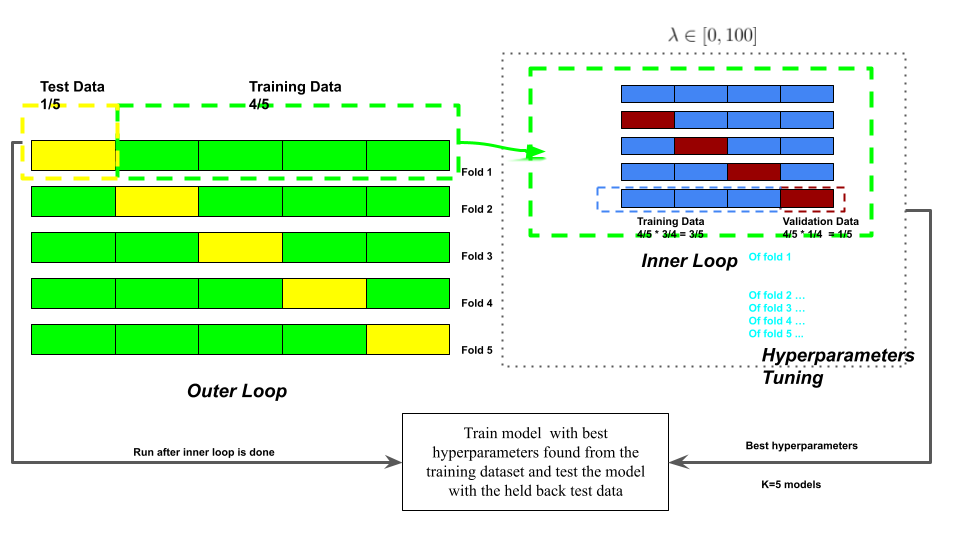

Reference: [https://mlfromscratch.com/nested-cross-validation-python-code/](https://mlfromscratch.com/nested-cross-validation-python-code/)

###1.b.

Reference: [https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/)

The classification error in this question is computed as  
$$\frac{Num\: of\: Misclassified\: Samples}{Total\: Num\: of\: Samples}$$

In [5]:
# Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
def visualize():
  sns.set_theme()
  plt.figure(figsize=(15, 7))
  # Error bar
  plt.errorbar(lambdas, 1-means, stds, color="black", ecolor="red",  capsize=4, label="\u00B5E(\u03BB) \u00B1 \u03C3E(\u03BB)")
  # Minimum Error
  plt.plot(lambdas[min_index], 1-means[min_index], "bo", label="\u00B5E(\u03BBmin)")
  plt.axvline(x=lambdas[min_index], color="blue", linestyle="--")
  # Error of lambda star
  plt.plot(lambda_star, 1-means[star_index], "go", label="\u00B5E(\u03BB*)")
  plt.axvline(x=lambda_star, color="green", linestyle="--")

  plt.title("Cross-Validated Classification Error Rate of\nLogistic Regression with Elasticnet Regularization\nAlpha=0.95")
  plt.xscale("log")
  plt.xlabel("Lambdas (log scale)")
  plt.ylabel("Classification Error")
  plt.legend()
  plt.show()

  return

Fold 1
Outerloop test accuracy: 0.873
Innerloop estimate accuracy: 0.861
Optimal parameters λ: 0.53389 



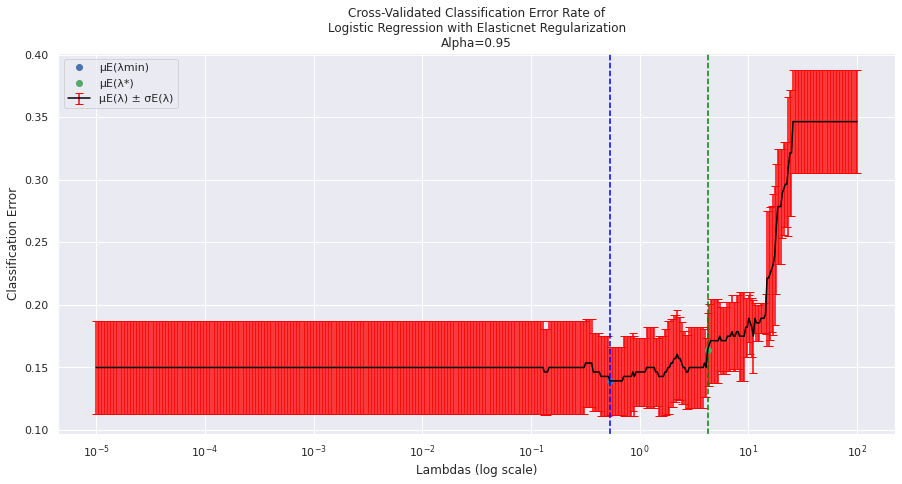

Fold 2
Outerloop test accuracy: 0.900
Innerloop estimate accuracy: 0.879
Optimal parameters λ: 0.8667100000000001 



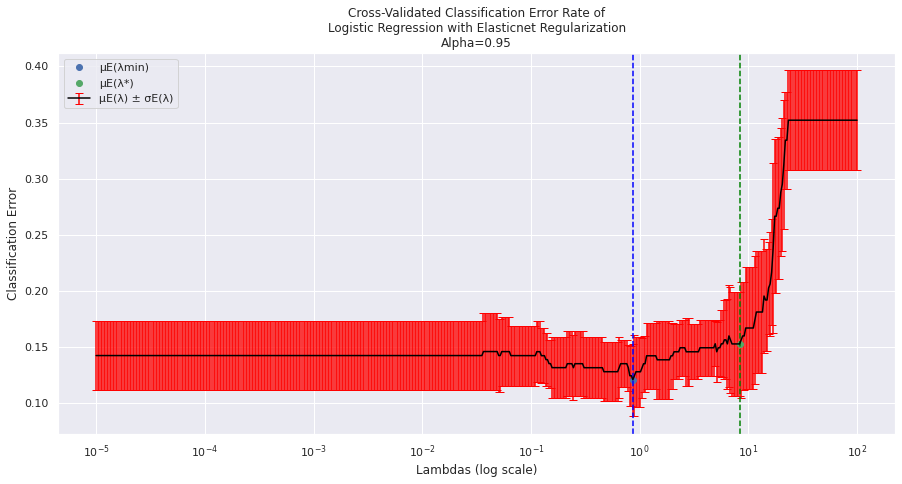

Fold 3
Outerloop test accuracy: 0.857
Innerloop estimate accuracy: 0.879
Optimal parameters λ: 0.41231999999999996 



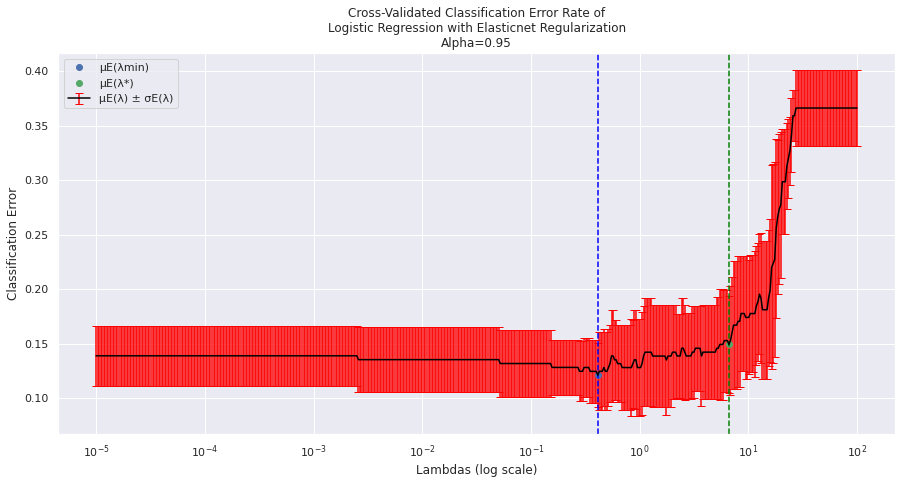

Fold 4
Outerloop test accuracy: 0.914
Innerloop estimate accuracy: 0.872
Optimal parameters λ: 0.73745 



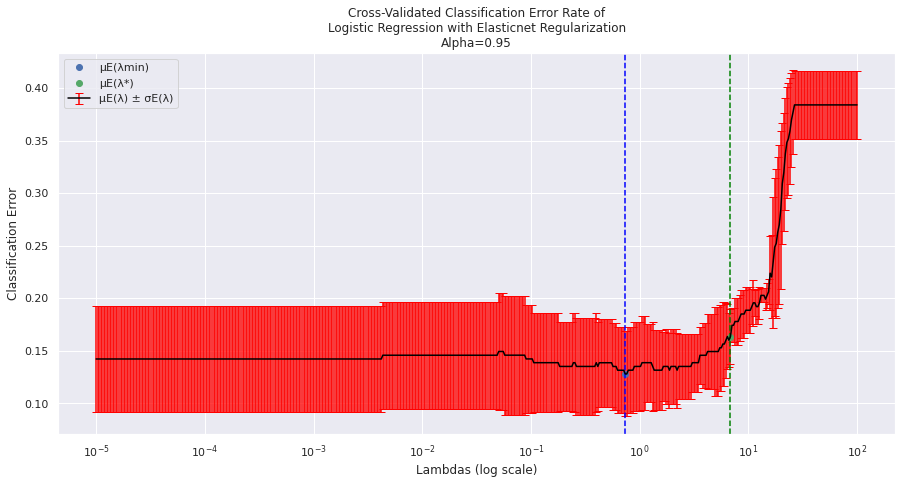

Fold 5
Outerloop test accuracy: 0.757
Innerloop estimate accuracy: 0.893
Optimal parameters λ: 2.5165 



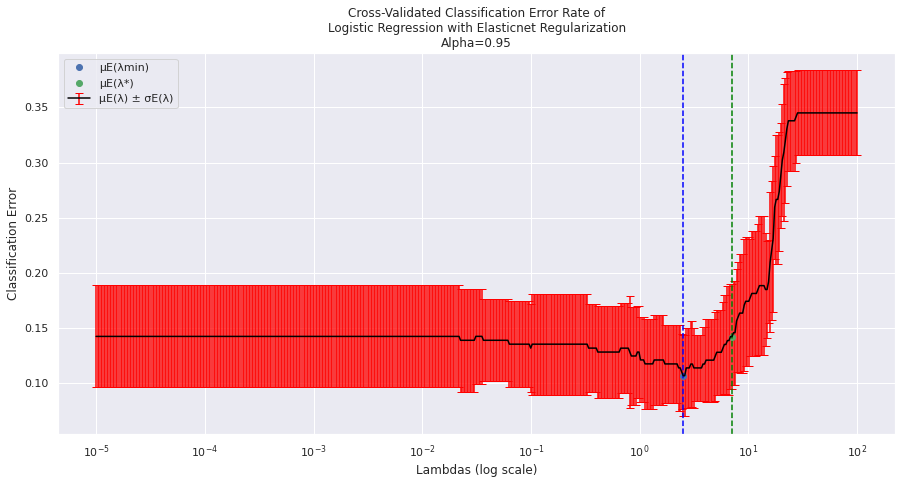

Generalized performance: 0.860    ± 0.055

Outer Loop Test Results:
[0.8732394366197183, 0.9, 0.8571428571428571, 0.9142857142857143, 0.7571428571428571]

Inner Loop Training Results:
[0.8761904761904762, 0.8809523809523809, 0.8714285714285714, 0.8857142857142857, 0.8857142857142857, 0.8862559241706162, 0.8672985781990521, 0.8720379146919431, 0.861904761904762, 0.8578199052132701, 0.8246445497630331, 0.8672985781990521, 0.8571428571428571, 0.8483412322274881, 0.8625592417061612, 0.8672985781990521, 0.8761904761904762, 0.8815165876777251, 0.8672985781990521, 0.8815165876777251]

Inner Loop Validation Results:
[0.8571428571428571, 0.8285714285714286, 0.8857142857142857, 0.8285714285714286, 0.8169014084507042, 0.8428571428571429, 0.8571428571428571, 0.8857142857142857, 0.7464788732394366, 0.8, 0.8714285714285714, 0.9, 0.8450704225352113, 0.8, 0.8714285714285714, 0.8428571428571429, 0.8028169014084507, 0.8714285714285714, 0.9285714285714286, 0.8285714285714286]


In [32]:
# Empty list to hold the test result of the Outer Loop
outer_results = list()
training_results = list()
validation_results = list()
# Configure the outer cross validation procedure
cv_outer = KFold(n_splits=5, shuffle=True, random_state=2021)
# Enumerate the folds
fold = 1
for train_ix, test_ix in cv_outer.split(data_X):
  # Split the data
  X_train, X_test = data_X[train_ix, :], data_X[test_ix, :]
  y_train, y_test = data_y[train_ix], data_y[test_ix]
  # Configure the inner cross validation procedure
  cv_inner = KFold(n_splits=4, shuffle=True, random_state=2021)
  # Define the model
  model = LogisticRegression(random_state=0, penalty="elasticnet",
                solver="saga", l1_ratio=0.95)
  # define search space
  space = dict()
  space['C'] = 1/lambdas
  # Define the model for parameters tuning
  search = GridSearchCV(model, space, scoring="accuracy", cv=cv_inner, refit=True, return_train_score=True)
  # Excute grid search
  result = search.fit(X_train, y_train)
  # Get the best performiing model fit on the whole training set
  best_model = result.best_estimator_
  # Get the mean and standard deviation of different lambda values
  # Means
  means = search.cv_results_["mean_test_score"]
  # Standard Errors
  stds = search.cv_results_["std_test_score"]
  # Evaluate the model in the hold out test dataset
  yhat = best_model.predict(X_test)
  # Classification accuracy
  acc = accuracy_score(y_test, yhat)
  # Store the test results
  outer_results.append(acc)
  # Store the training results
  training_results.append(search.cv_results_["split0_train_score"][star_index])
  training_results.append(search.cv_results_["split1_train_score"][star_index])
  training_results.append(search.cv_results_["split2_train_score"][star_index])
  training_results.append(search.cv_results_["split3_train_score"][star_index])
  # Store the validation results
  validation_results.append(search.cv_results_["split0_test_score"][star_index])
  validation_results.append(search.cv_results_["split1_test_score"][star_index])
  validation_results.append(search.cv_results_["split2_test_score"][star_index])
  validation_results.append(search.cv_results_["split3_test_score"][star_index])

  print("Fold {}".format(fold))
  print("Outerloop test accuracy: {:.3f}".format(acc))
  print("Innerloop estimate accuracy: {:.3f}".format(result.best_score_))
  print("Optimal parameters \u03BB: {}".format(1/result.best_params_["C"]), "\n")

  # In case there are multiple minimum error point
  min_index_list = np.array([])
  # Get only the first one
  min_index = int(np.append(min_index_list, np.argmin(1-means))[0])
  # Try to find the index of the lamda star
  std_lambdas = lambdas[1 - means < (1- means[min_index] + stds[min_index])]
  # Get the index and the lambda star
  lambda_star = np.max(std_lambdas)
  star_index = np.where(lambdas == lambda_star)[0][0]

  # Visualize
  visualize()

  # Update the fold number
  fold += 1
# Summarize the generalized performance of the model
print("Generalized performance: {:.3f}\
    \u00B1 {:.3f}".format(mean(outer_results), std(outer_results)))
print("\nOuter Loop Test Results:")
print(outer_results)
print("\nInner Loop Training Results:")
print(training_results)
print("\nInner Loop Validation Results:")
print(validation_results)

###1.c.

In [34]:
# Save all the rsults we want to plot in a dictionary
values_dict = dict()
values_dict["Test Errors"] = outer_results
values_dict["Training Errors"] = training_results
values_dict["Validation Errors"] = validation_results

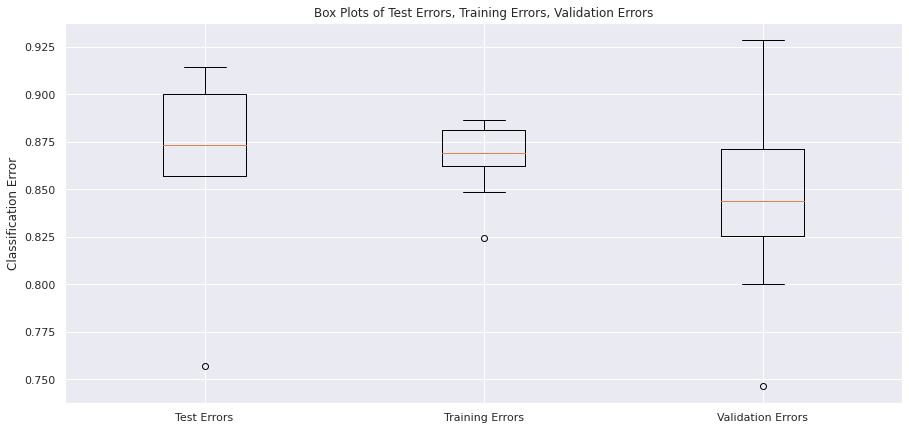

In [42]:
# Visualize the box plot
plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots()
ax.boxplot(values_dict.values())
ax.set_xticklabels(values_dict.keys())
plt.ylabel("Classification Error")
plt.title("Box Plots of Test Errors, Training Errors, Validation Errors")
plt.show()

As we can see from the box plots, by using nested cross validation, the test errors, taining errors, validation errors have similar mean value, which means that the validation is successful and not that biased. The Test errors and validation errors have bigger variance than than the training errors.

Nested cross-validation (CV) is often used to train a model in which hyperparameters also need to be optimized. Nested CV estimates the generalization error of the underlying model and its (hyper)parameter search. Choosing the parameters that maximize non-nested CV biases the model to the dataset, yielding an overly-optimistic score.

Model selection without nested CV uses the same data to tune model parameters and evaluate model performance. Information may thus “leak” into the model and overfit the data. 

To avoid this problem, nested CV effectively uses a series of train/validation/test set splits. In the inner loop (here executed by GridSearchCV), the score is approximately maximized by fitting a model to each training set, and then directly maximized in selecting (hyper)parameters over the validation set. In the outer loop (here in cross_val_score), generalization error is estimated by averaging test set scores over several dataset splits.

## Problem 2

For this problem here I only show the implementation of ElasticNet Regulariation via soft-thresholding and iterative reweighted least-squares aproach.

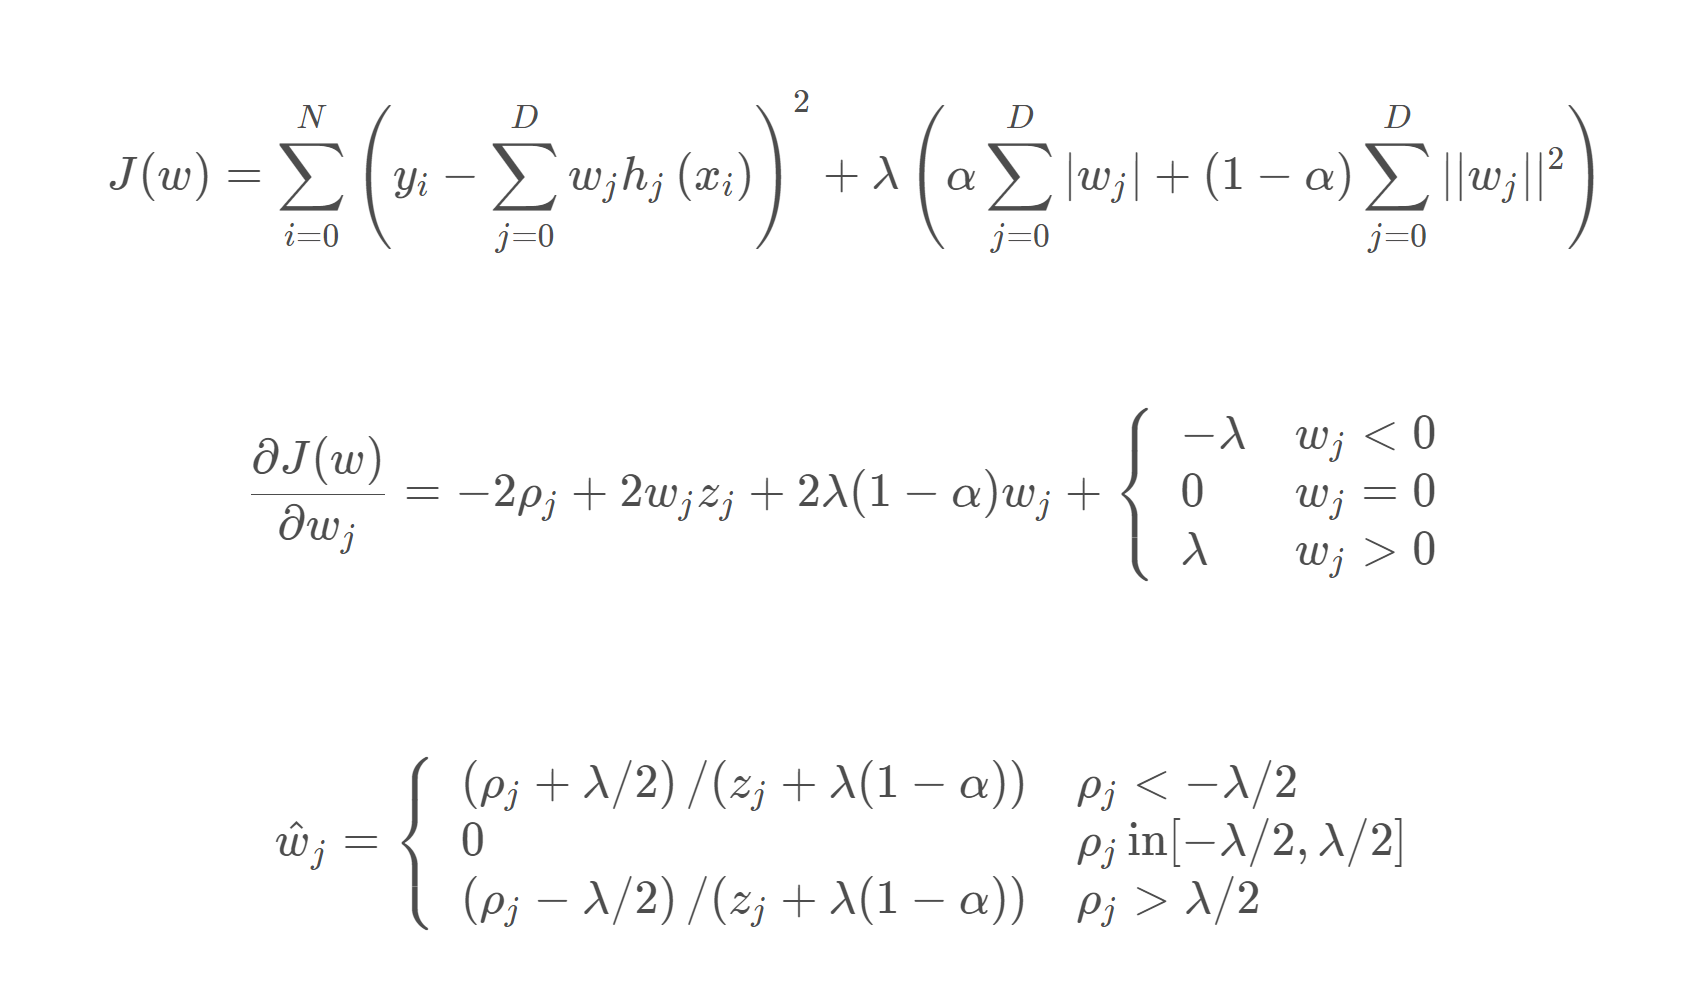

In [70]:
# Implemntation of Softthresholding
def soft_thresholding_operator(rho_j, lambda_):
  if rho_j > lambda_/2:
    return rho_j - lambda_

  elif rho_j < -lambda_/2:
    return rho_j + lambda_
  else:
    return 0.0

In [76]:
def ElasticNet(X, y, lambd, alpha=0.95, max_iter=100):
  X = np.column_stack((np.ones(len(X)), X))
  beta = np.zeros(X.shape[1])

  for iteration in range(max_iter):
    for j in range(1, len(beta)):
      tmp_beta = beta.copy()
      tmp_beta[j] = 0.0
      rho_j = y - np.dot(X, tmp_beta)
      lambda_ = alpha * lambd * X_shape[0]

      beta[j] = soft_thresholding_operator(rho_j,
              lambda_)/((X[:, j]**2).sum()+alpha*(1-lambd)*X.shape[0])

      beta[0] = np.sum(y-np.dot(X[:, 1:], beta[1:]))/(X.shape[0])

  intercept = beta[0]
  coef = beta[1:]

  return intercept, coef

For the visualization part I used the package glmnet_py for visualization, by replacing my elastic net definition in their package  
[https://glmnet-python.readthedocs.io/en/latest/glmnet_vignette.html](https://glmnet-python.readthedocs.io/en/latest/glmnet_vignette.html)

In [81]:
fit = glmnet_reimplement(x=data_X, y=data_y, lambda_=lambdas, alpha=0.95)

In [83]:
# Call the plotting function from the package
from  glmnet_python import *
from glmnetplot import glmnetplot

glmnetplot(fit, xvar="lambda", label=True)

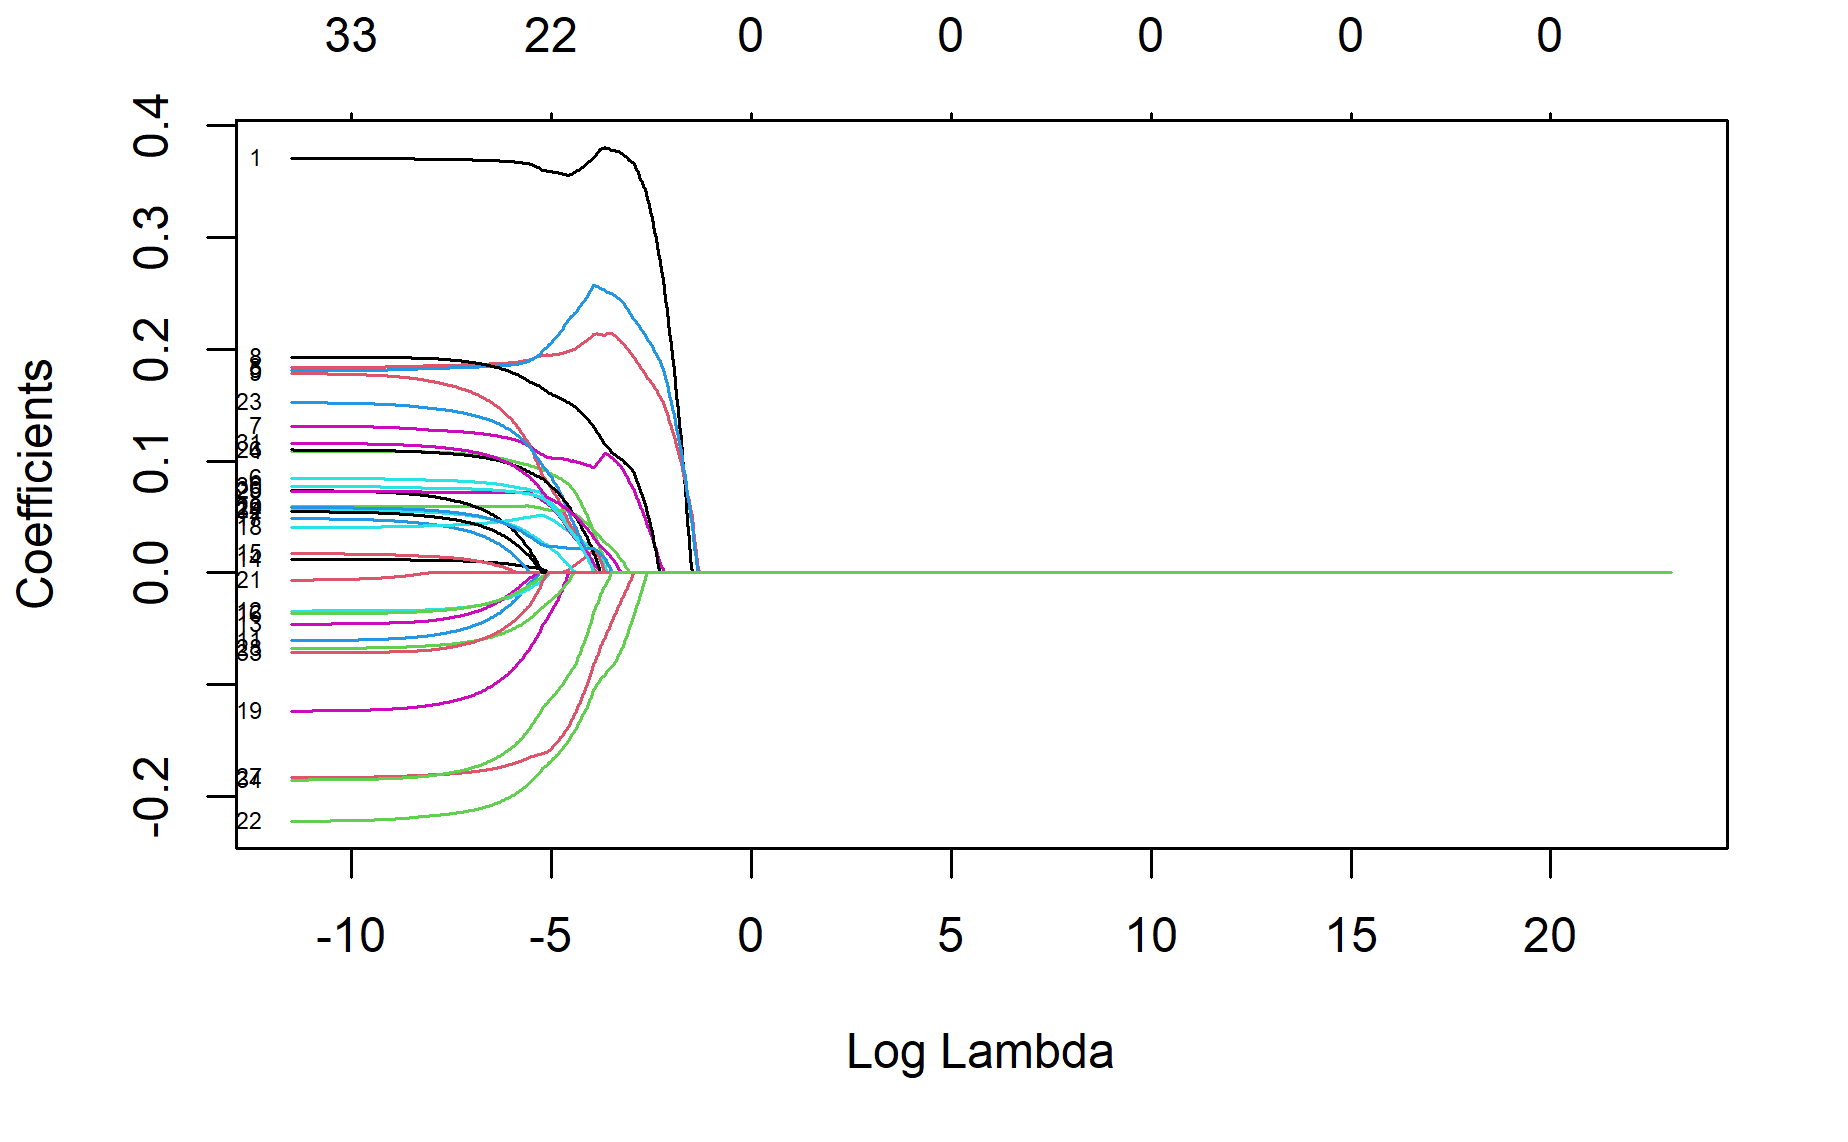